# Notebook to extract the max of Susceptibility

In [1]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [2]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


alpha-2.0_nv-10_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-10_h-1.free-energy.h5
xi max.: 0.36660811
Temp. at mag_suscept max.: 4.0078163


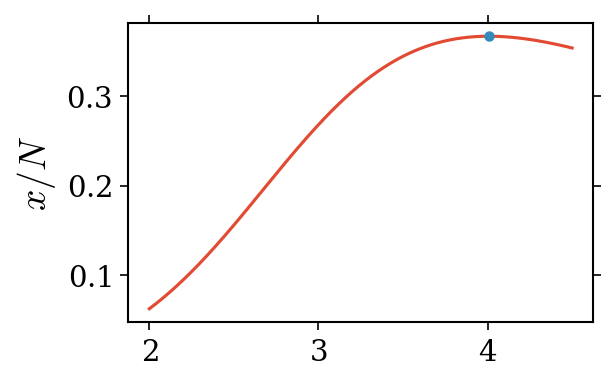

alpha-2.0_nv-11_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-11_h-1.free-energy.h5
xi max.: 0.36586468
Temp. at mag_suscept max.: 4.0297997


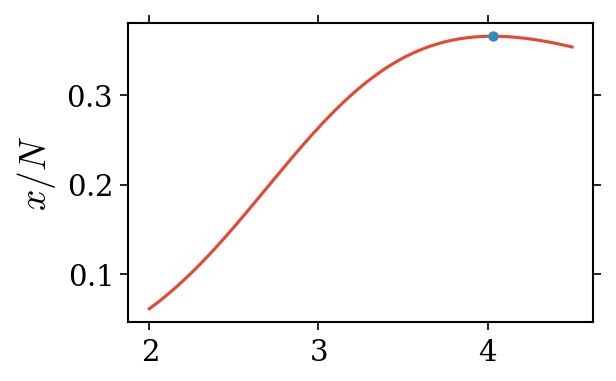

alpha-2.0_nv-12_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-12_h-1.free-energy.h5
xi max.: 0.36523685
Temp. at mag_suscept max.: 4.0481192


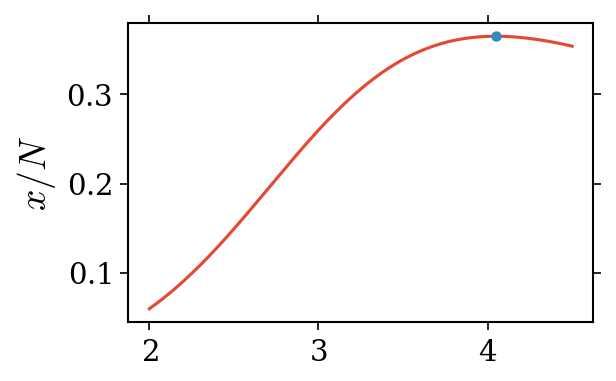

alpha-2.0_nv-13_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-13_h-1.free-energy.h5
xi max.: 0.36469988
Temp. at mag_suscept max.: 4.0639961


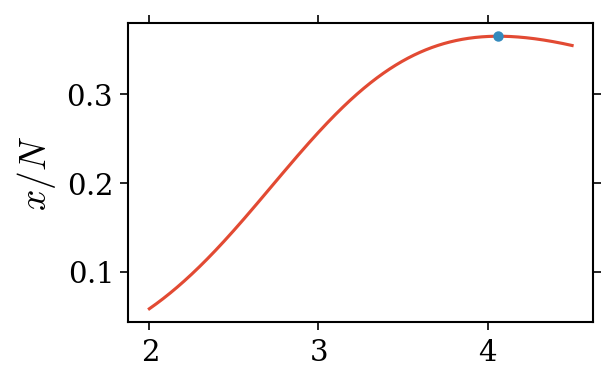

alpha-2.0_nv-14_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-14_h-1.free-energy.h5
xi max.: 0.36423596
Temp. at mag_suscept max.: 4.0786517


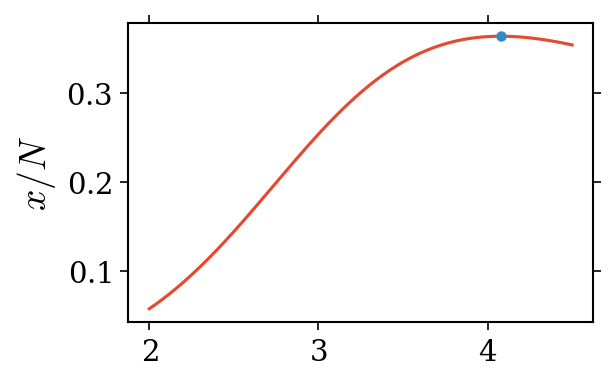

alpha-2.0_nv-15_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-15_h-1.free-energy.h5
xi max.: 0.36383097
Temp. at mag_suscept max.: 4.0908647


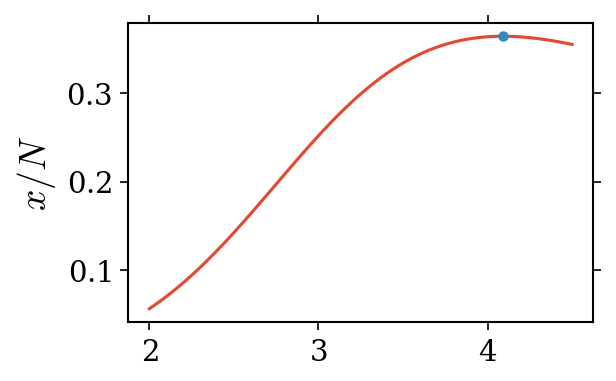

alpha-2.0_nv-20_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-20_h-1.free-energy.h5
xi max.: 0.36239669
Temp. at mag_suscept max.: 4.1328774


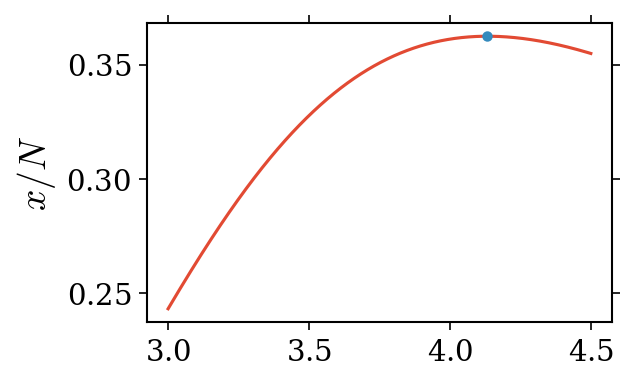

alpha-2.0_nv-2_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-2_h-1.free-energy.h5
xi max.: 0.38838388
Temp. at mag_suscept max.: 3.3001954


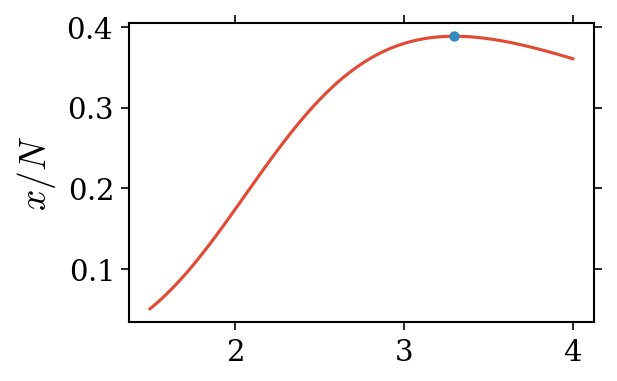

alpha-2.0_nv-3_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-3_h-1.free-energy.h5
xi max.: 0.38151151
Temp. at mag_suscept max.: 3.5395701


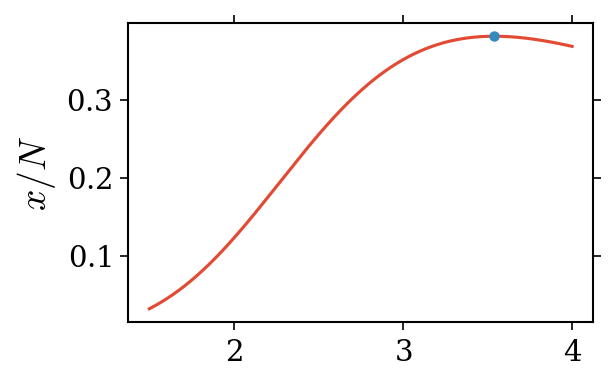

alpha-2.0_nv-4_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-4_h-1.free-energy.h5
xi max.: 0.37705766
Temp. at mag_suscept max.: 3.6858818


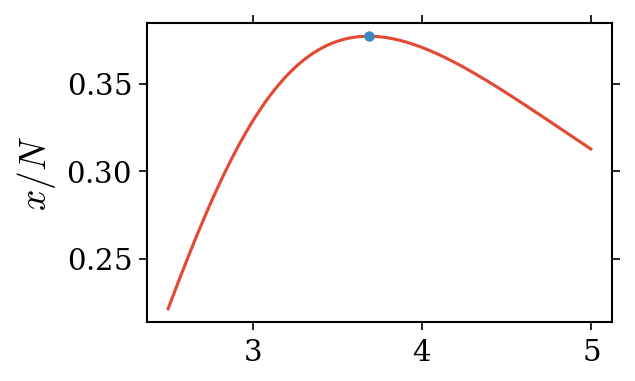

alpha-2.0_nv-5_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-5_h-1.free-energy.h5
xi max.: 0.37395343
Temp. at mag_suscept max.: 3.784807


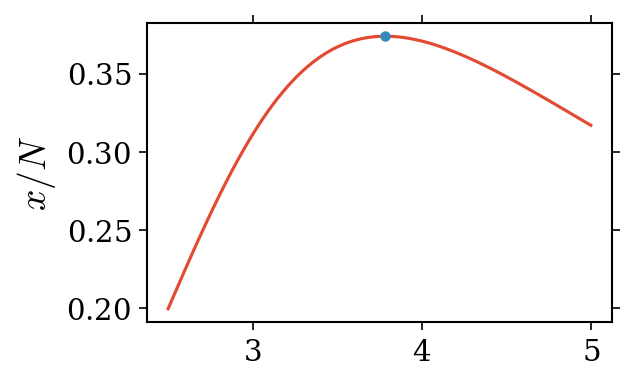

alpha-2.0_nv-6_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-6_h-1.free-energy.h5
xi max.: 0.37167849
Temp. at mag_suscept max.: 3.8544211


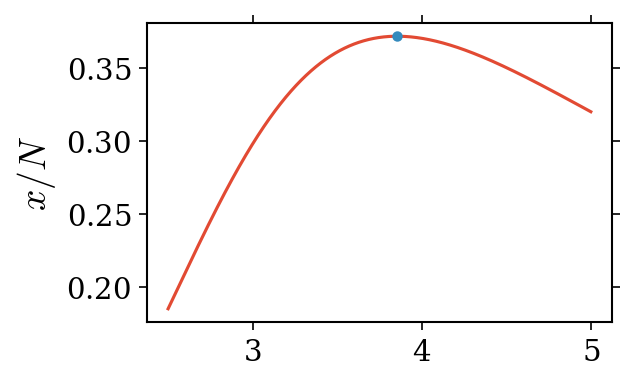

alpha-2.0_nv-7_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-7_h-1.free-energy.h5
xi max.: 0.3699473
Temp. at mag_suscept max.: 3.906937


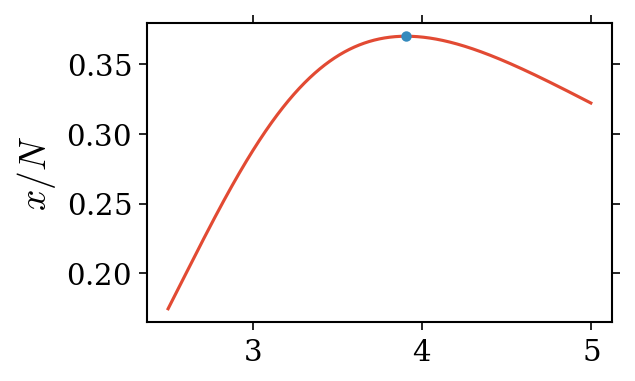

alpha-2.0_nv-8_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-8_h-1.free-energy.h5
xi max.: 0.36859013
Temp. at mag_suscept max.: 3.9479726


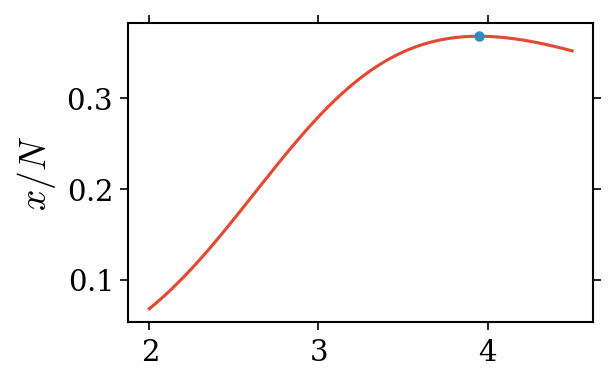

alpha-2.0_nv-9_h-1.yml
C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\alpha-2.0_nv-9_h-1.free-energy.h5
xi max.: 0.36750045
Temp. at mag_suscept max.: 3.9809477


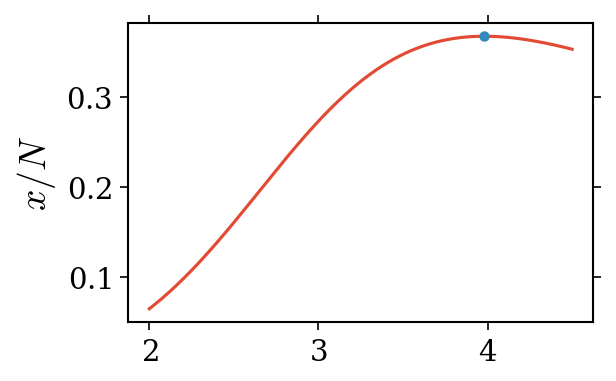

Exporting data to C:\Users\MHJGuillermo\PycharmProjects\Doctorado\Ising\Varios_vecinos\venv\data\h-1\alpha_2.0\max_mag_suscept.csv


In [5]:
list_alphas = [2.0]
all_max_mag_suscept = {}
for alpha in list_alphas:
    all_max_mag_suscept[alpha] = {}
    data_path = Path("../../../data/h-1/alpha_{}".format(alpha)).resolve()
    all_files = os.listdir(data_path)
    regex = re.compile('.*\.yml')
    yaml_files = [i for i in all_files if regex.match(i)]
    for file in yaml_files:
        try:
            config_file = Path(os.path.join(data_path,file)).resolve()
            energy_file = config_file.with_suffix(".free-energy.h5")
            print(file)
            print(energy_file)

            nv = 2
            sub_string = re.search('alpha-{}_nv-(.+?)_h-1.yml'.format(alpha), file)
            if sub_string:
                found = sub_string.group(1)
                nv = int(found)

            with config_file.open() as cfp:
                config_info = yaml.load(cfp)
            config_data = read_ising_config(config_info)

            with h5py.File(str(energy_file)) as h5fp:
                data_energy = h5fp["/free-energy"][()]

            temp = config_data["system"]["temperature"]
            mag_field = config_data["system"]["magnetic_field"]
            free_erg = data_energy[:, :]
            epsilon = mag_field[1]-mag_field[0]
            mag_suscept = -(free_erg[:,1] - 2 * free_erg[:,2] + free_erg[:,3])/(epsilon**2)

            # Zero magnetic field spline
            mag_suscept_spl_zmf = interp.UnivariateSpline(temp,
                                                       mag_suscept,
                                                       s=0, k=4)
            temp_fine = np.linspace(temp.min(), temp.max(), 2048)

            mag_suscept_fine = mag_suscept_spl_zmf(temp_fine)
            max_idx = np.argmax(mag_suscept_fine)
            temp_mag_suscept_max, mag_suscept_max = temp_fine[max_idx], mag_suscept_fine[max_idx]

            print(f"xi max.: {mag_suscept_max:.8G}")
            print(f"Temp. at mag_suscept max.: {temp_mag_suscept_max:.8G}")
            all_max_mag_suscept[alpha][nv] = {
                'max_mag_suscept': mag_suscept_max,
                'temp_at_max_mag_suscept': temp_mag_suscept_max
            }

            use_tex = False

            # Load the default style.
            style.use("default")
            rcParams["text.usetex"] = use_tex

            fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
            grid_spec = GridSpec(3, 1)

            # Specific heat subplot.
            ax: Axes = fig1.add_subplot(grid_spec[0, 0])

            ax.plot(temp_fine, mag_suscept_fine, lw=1.5)
            ax.plot(temp_mag_suscept_max, mag_suscept_max, marker="o", lw=0)

            # ax.set_xlabel(r"$k_\mathrm{B} T / J$")
            ax.set_ylabel(r"$x / N$")

            pyplot.draw()
            pyplot.show()
            
        except KeyError:
            print('error with this file {}'.format(file))
                
    # Export to pandas 
    print('Exporting data to {}'.format(os.path.join(data_path,'max_mag_suscept.csv')))
    df = pd.DataFrame(all_max_mag_suscept[alpha])
    df.loc['inv_temp_at_max_mag_suscept'] = 1/df.loc['temp_at_max_mag_suscept']
    df = df.reindex(sorted(df.columns), axis=1)
    df.to_csv(os.path.join(data_path,'alpha-{}_max_mag_suscept.csv'.format(alpha)))
        

In [6]:
df_exp = df.reindex(sorted(df.columns), axis=1)

In [8]:
df_exp.to_csv(os.path.join(data_path,'alpha-{}_max_mag_suscept.csv'.format(alpha)))